<a href="https://colab.research.google.com/github/Dvitee/Task-2/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Load Titanic dataset
df = pd.read_csv('td.csv')  # Adjust path if needed
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Summary of numerical features
df.describe()

# Summary of categorical features
df.describe(include='object')

# Check for missing values
df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Handle Missing Values

In [4]:
df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [6]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

Convert Categorical Variables

In [7]:
# Convert 'Sex' and 'Embarked' to category types
df['Sex'] = df['Sex'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')

In [8]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Sex          891 non-null    category
 4   Age          891 non-null    float64 
 5   SibSp        891 non-null    int64   
 6   Parch        891 non-null    int64   
 7   Fare         891 non-null    float64 
 8   Embarked     891 non-null    category
dtypes: category(2), float64(2), int64(5)
memory usage: 50.8 KB


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


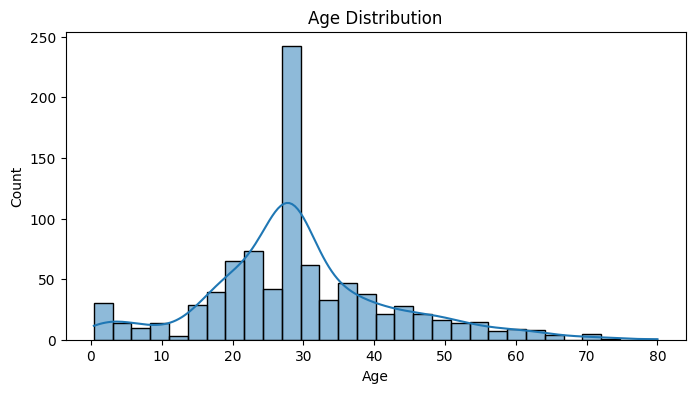

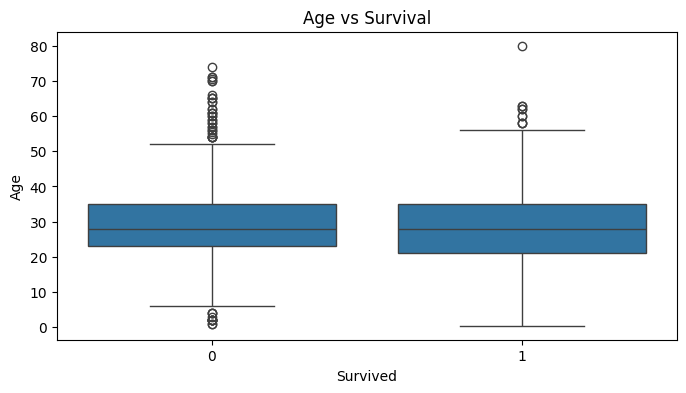

In [9]:
# Histogram of Age
plt.figure(figsize=(8, 4))
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

# Boxplot of Age by Survival
plt.figure(figsize=(8, 4))
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age vs Survival')
plt.show()

Correlation & Pairplot

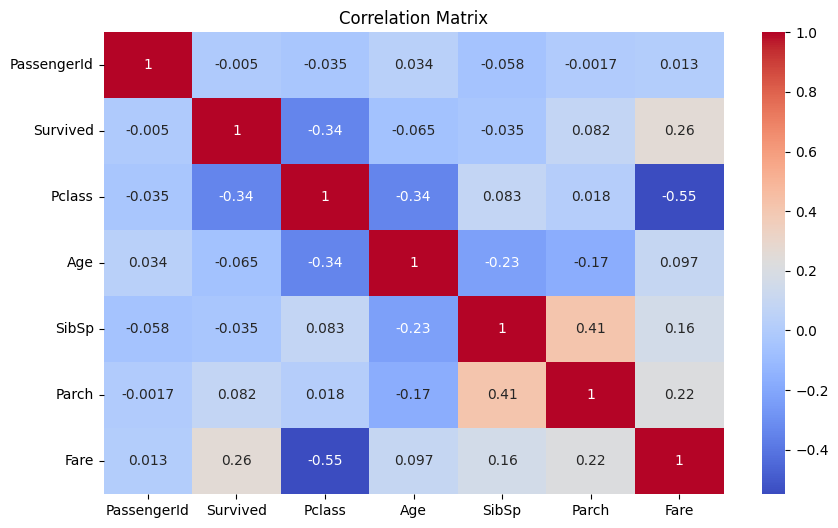

In [20]:
# Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

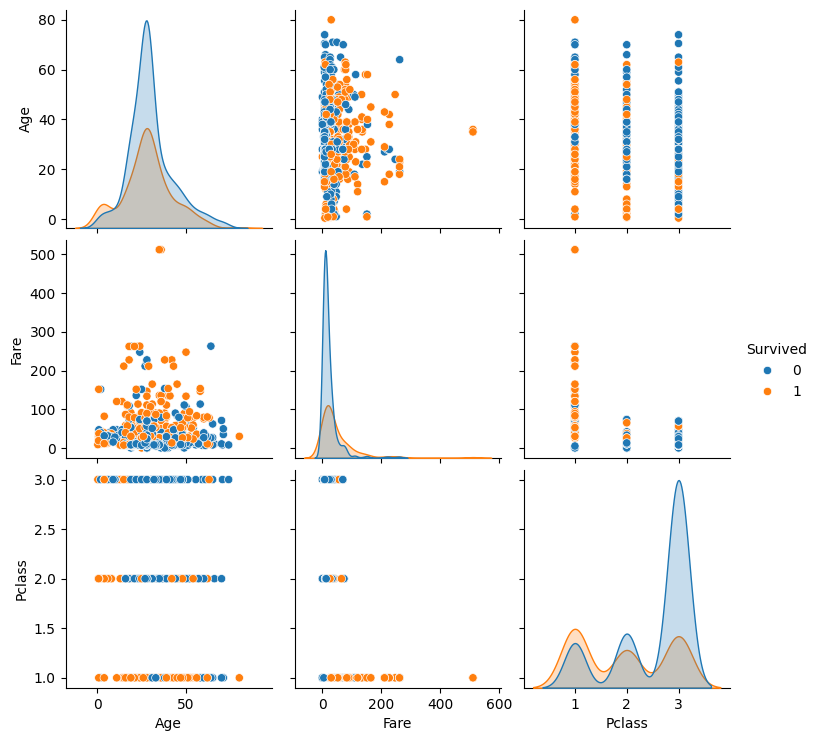

In [21]:

# Pairplot (optional due to size)
sns.pairplot(df[['Survived', 'Age', 'Fare', 'Pclass']], hue='Survived')
plt.show()

Categorical Analysis

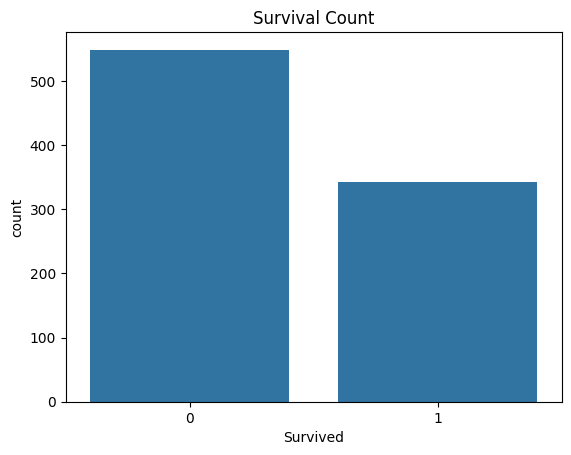

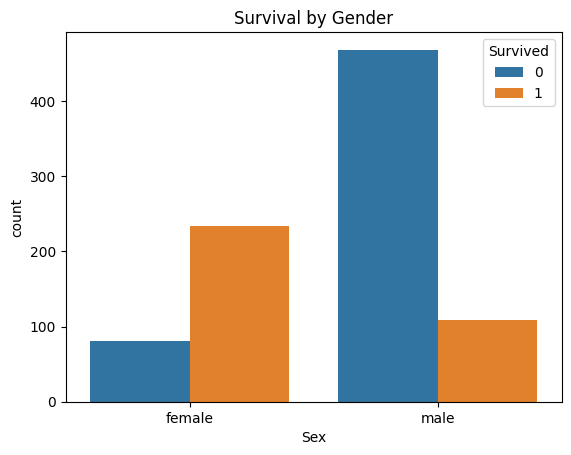

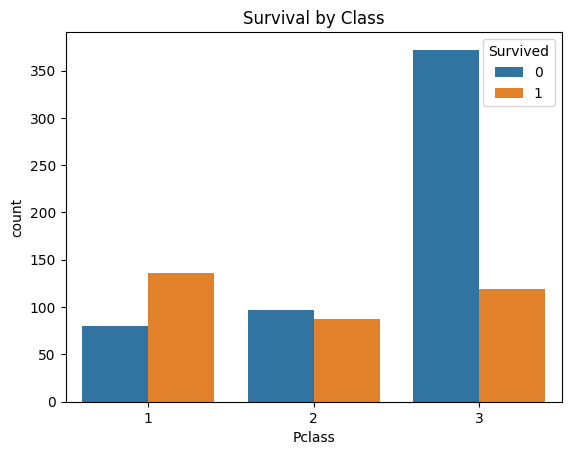

In [22]:
# Survival count
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()

# Survival by Gender
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Gender')
plt.show()

# Survival by Passenger Class
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival by Class')
plt.show()


Females had a much higher survival rate than males.

The total number of deaths was greater than the number of survivors.

First-class passengers had the highest survival rate among all classes.

Third-class passengers had the lowest survival rate.

1. What is the purpose of EDA?
→ EDA (Exploratory Data Analysis) is done to deeply understand the dataset, find patterns, spot anomalies, test assumptions, and prepare for building better models.

2. How do boxplots help in understanding a dataset?
→ Boxplots visually show the spread of data (minimum, 25th percentile, median, 75th percentile, maximum) and highlight outliers, helping spot skewness or unusual data points easily.

3. What is correlation and why is it useful?
→ Correlation measures how strongly two variables move together. It helps in feature selection by identifying variables that are strongly related to the target or each other.

4. How do you detect skewness in data?
→ Skewness can be detected by plotting histograms, using boxplots, or calculating skewness statistics; a skewness value not close to zero indicates asymmetry in data.

5. What is multicollinearity?
→ Multicollinearity happens when independent features are highly correlated, which can make model coefficients unstable and reduce the model's ability to interpret feature importance correctly.

6. What tools do you use for EDA?
→ Common tools are Pandas (for data handling), Matplotlib and Seaborn (for visualization), Plotly (for interactive plots), and sometimes NumPy (for calculations).

7. Can you explain a time when EDA helped you find a problem?
→ In a project, EDA showed that a feature had many missing values and several extreme outliers, which would have misled the model if not handled; fixing them improved performance.

8. What is the role of visualization in ML?
→ Visualization makes it easier to understand feature relationships, detect errors or patterns early, communicate insights clearly, and build better machine learning models.